# TP Optimisation II:  A simple neural network 

### Nom(s): Haliloua
### Prénom(s): Othmane
### Groupe: B1

## Useful packages

In [1]:
import numpy as np
import random
import math as m
import matplotlib.pyplot as plt
import math as m
from sklearn.utils import shuffle

## Loading of the train and test data

In [2]:
#
# Load train data
#

Xtrain = np.load('train-images.npy')
Xtrain = np.array([x.ravel()/255 for x in Xtrain])
Xtrain = Xtrain.reshape(Xtrain.shape[0],Xtrain.shape[1],1)
Ytrain = np.load('train-labels.npy')
targets_train = []

#
# Convert digits to 10x1 vectors
#

for lab in Ytrain:
    v      = np.zeros((10,1))
    v[lab] = 1
    targets_train+=[np.array(v)]

#
# Load test data
#
Xtest        = np.load('t10k-images.npy')
Xtest        = np.array([x.ravel()/255 for x in Xtest])
Xtest        = Xtest.reshape(Xtest.shape[0],Xtest.shape[1],1)
Ytest        = np.load('t10k-labels.npy')
targets_test = []

#
# Convert digits to 10x1 vectors
#
for lab in Ytest:
    v = np.zeros((10,1))
    v[lab]=1
    targets_test+=[np.array(v)]
#
# Outputs
#

#print('There are ',Xtrain.shape[0],'images in the train set')
#print('There are ',Xtest.shape[0],'images in the test set')
#print('targets_train ', len(targets_train))
#print('targets_test ', len(targets_test))
#print('targets_train[0] ', len(targets_train[0]))
#print('targets_test[0] ', len(targets_test[0]))
#print('Xtrain[0] ', (Xtrain[0]).shape)
#print('Ytrain ', (Ytrain).shape)

## Definition of the activation function

 The activation function defines the output of a node given a set of inputs. We use the <a href="https://en.wikipedia.org/wiki/Softmax_function">softmax</a> function defined by
 
 $$\sigma_{\alpha} : \mathbb{R}^p\rightarrow [0,1]^p, \quad s.t. \quad[\sigma_{\alpha}(x)]_i=\frac{e^{x_i+\alpha_i}}{\displaystyle{\sum_{j=1}^{p}e^{x_j+\alpha_j}}}\quad \forall i=1:p. $$  


In [3]:
#
# Nonlinear activation function
#
def softmax(x,alpha):
    """
    Softmax unit activation function 
    x    : Numpy array
    alpha: scalar
    """ 
    #
    # TO DO
    # done below
    sum = 0
    value = np.zeros((np.size(x),1))
    for i in range(np.size(x)):
        sum += m.exp(x[i] + alpha[i])
        value[i] = m.exp(x[i] + alpha[i])
    for j in range(np.size(x)):
        value[j] = value[j]/sum
    return value

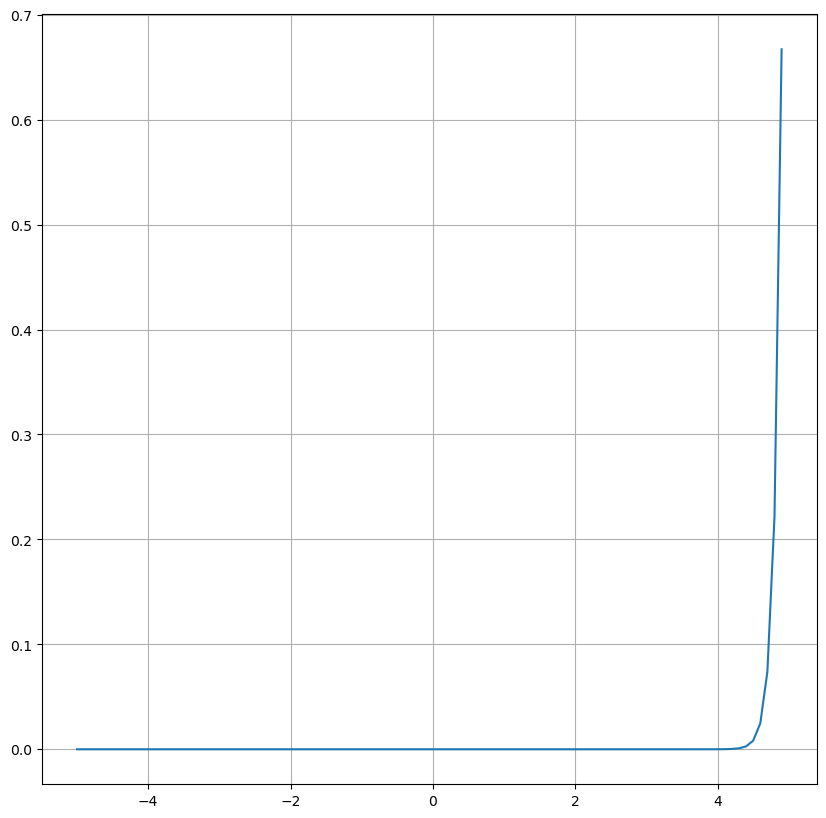

In [4]:
#
# Example of a plot of the activation function
#
t     = np.arange(-5,5,0.1)
alpha = np.arange(-50,50,1)
plt.figure(figsize=(10,10))
plt.plot(t,softmax(t,alpha))
plt.grid(True)
plt.show()

## Definition of a simple neural network

We use a one-layer fully-connected neural network with the <a href="https://en.wikipedia.org/wiki/Softmax_function">softmax</a> activation function.


In [5]:
def NN(x,W):
    """
    # One-layer fully connected neural network
    # x: image, i.e. 784x1 vector (28x28)
    # W: weight matrices of shape 10x784   
    """
    #
    # TO DO: return pred (predicted probabilities) 
    # done below

    z = np.dot(W, x)
    pred = softmax(z,np.zeros((np.size(x),1)))
    
    
    return pred

## Definition of the loss function

The loss function is the <a href="https://en.wikipedia.org/wiki/Cross_entropy">cross-entropy</a> defined by 

$$J(W)=-\sum_{i=1}^{N} p_{i} \log(q_{i}(W)),$$


 where N is the number of classes, $(p_{i})_{i=1:N}$ are the probabilities of  a data from the training set to belong to a class (0 or 1 because the labels are known), and $(q_i(W))_{i=1:N}$ are the predicted probabilities from the model

$$\forall i=1:N, \quad q_i(W)=[\sigma_{\alpha}(Wx)]_i.$$

In [6]:
#
# Loss function = Cross-entropy
#
def cross_entropy(pred,target,x):
    """
    pred:   predicted probabilities (q(W))
    target: probabilities (p)
    x:      image 
    """ 
    #
    # TO DO: return ce (cross_entropy)
    # done below
    ce = - np.transpose(target).dot(np.log(pred))[0,0]

    # gradient of the cross-entropy
    s = pred
    u    =  np.ones((s.shape[0],1))
    g    = (-u.T.dot(target)*(s.dot(x.T))+target*x.T)
    grad = -g.reshape(x.shape[0]*target.shape[0],1)
    
    return ce,grad
#
# Main function 
#
def f(W,x,target):
    """
    W:      weights
    target: probabilities (p)
    x:      image
    """
    #
    # TO DO: return ce, grad, pred (cross_entropy, gradient, predicted probabilities)
    # done below

    pred = NN(x,W)
    ce,grad = cross_entropy(pred,target,x)
    
    return ce,grad,pred

In [7]:
#
# Test information on the gradient with calls of f
#

# Define weight matrices
W      = np.random.rand(10,Xtrain.shape[1])
eps    = 1e-8
d      = np.random.rand(10,Xtrain.shape[1])
Wtilde = W+eps*d

# Retrieve the information on the gradients
res    = (f(Wtilde,Xtrain[0],targets_train[0])[0]-f(W,Xtrain[0],targets_train[0])[0])/eps
print(res)

g      = f(W,Xtrain[0],targets_train[0])[1]
print(g.T.dot(d.reshape(7840,1)))

-6.032795063504182
[[-6.03279565]]


## Generating batches 

In [8]:
#
# Function to create batches of samples to be used later in the training phase
#
def create_batches(x,bs):
    """
    x : set to be considered (array)
    bs: batch size (scalar)
    """
    batches = []
    ind     = np.arange(x.shape[0])
    random.shuffle(ind)
    nbatch  = ind.shape[0]//bs
    rest    = ind.shape[0]%bs
    
    for n in range(nbatch):
        batches +=[ind[bs*n:bs*(n+1)]]
    
    # Put the remaining elements in a last batch
    if rest !=0:        
        batches += [ind[-rest:]]
        
    return batches

## Training of the neural network

In [9]:
history    = {}
eta        = 1e-5 # learning rate
momentum   = 0.   # momemtum factor
N_EPOCHS   = 10  
BatchSizes = [10000, 1024,256] # try different batch sizes for the analysis

for bs in BatchSizes:
    #
    # Sensitivity to the batch size to be investigated in the analysis
    #
    
    history[bs]={'train loss':[],'train acc':[],'test loss':[0], 'test acc':[0]}
    
    # Initialization of the weights
    w = np.random.rand(10,Xtrain.shape[1])
    for n in range(N_EPOCHS):
        # Minimization of the loss function
        
        Batches=create_batches(Xtrain,bs)
        for batch in Batches:
            # Loop on the batches
            #
            # TO DO
            #
            grads = np.zeros((w.shape[0],Xtrain.shape[1]))         #the sum of the gradients
            trn_accuracy = 0    #train accuracy
            trn_loss = 0       #train loss
            for i in batch:
                
                ce, grad, pred = f(w,Xtrain[i],targets_train[i])
                grads += grad.reshape(w.shape[0],Xtrain.shape[1])
                
                if (list(pred).index(max(pred)) == list(targets_train[i]).index(max(targets_train[i]))):
                    trn_accuracy +=1
                trn_loss += ce  #the accumulation of the loss

            history[bs]['train loss'] += [trn_loss/batch.shape[0]]
            history[bs]['train acc'] += [trn_accuracy/batch.shape[0]]

            w = w - eta*grads

        # Test accuracy at the end of each epoch  
        #
        # TO DO

        tst_accuracy = 0    #test accuracy 
        tst_loss = 0        #test_loss
        for i in range(Xtest.shape[0]):
            x = Xtest[i]
            targets = targets_test[i]
            ce, grad, pred = f(w,x,targets)
            v1 = max(pred)
            v2 = max(targets)
            tst_loss += ce  #the accumulation of the loss
            if (list(pred).index(v1) == list(targets).index(v2)):
                tst_accuracy +=1
            
        history[bs]['test acc'] += [tst_accuracy/Xtest.shape[0]]
        history[bs]['test loss'] += [tst_loss/Xtest.shape[0]]
        


        print('Epoch number :', n+1,'test accuracy:',history[bs]['test acc'][n+1],'test loss',history[bs]['test loss'][n+1])
        

    print('\n')      

Epoch number : 1 test accuracy: 0.1658 test loss 3.417177087062451
Epoch number : 2 test accuracy: 0.2139 test loss 2.6717226986341287
Epoch number : 3 test accuracy: 0.3085 test loss 2.2157993412852184
Epoch number : 4 test accuracy: 0.404 test loss 1.8970668190663367
Epoch number : 5 test accuracy: 0.476 test loss 1.6677295894536117
Epoch number : 6 test accuracy: 0.528 test loss 1.4966698110879855
Epoch number : 7 test accuracy: 0.5681 test loss 1.3651433117517073
Epoch number : 8 test accuracy: 0.5968 test loss 1.2612438075033203
Epoch number : 9 test accuracy: 0.6208 test loss 1.1771894697013687
Epoch number : 10 test accuracy: 0.6431 test loss 1.1078553404118936


Epoch number : 1 test accuracy: 0.1998 test loss 3.048452264663275
Epoch number : 2 test accuracy: 0.2687 test loss 2.475884000283322
Epoch number : 3 test accuracy: 0.3413 test loss 2.0769020832659937
Epoch number : 4 test accuracy: 0.4123 test loss 1.7851790542015387
Epoch number : 5 test accuracy: 0.4763 test loss 1.

## Plots of the evolution of the loss function

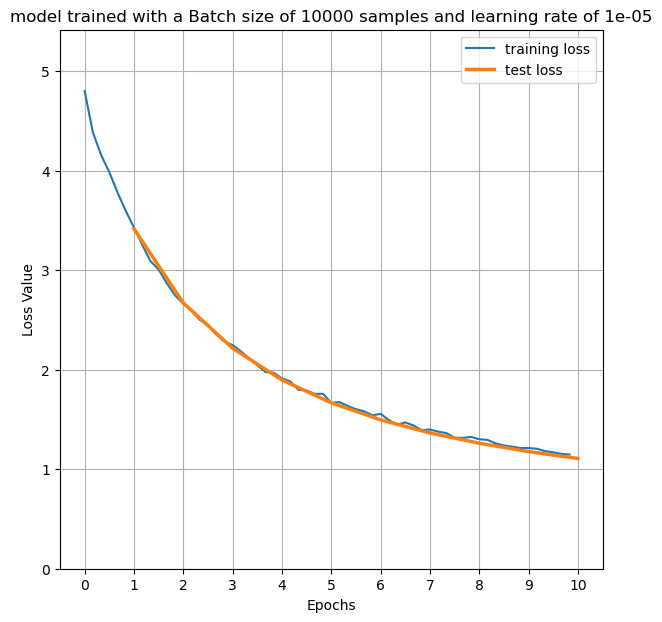

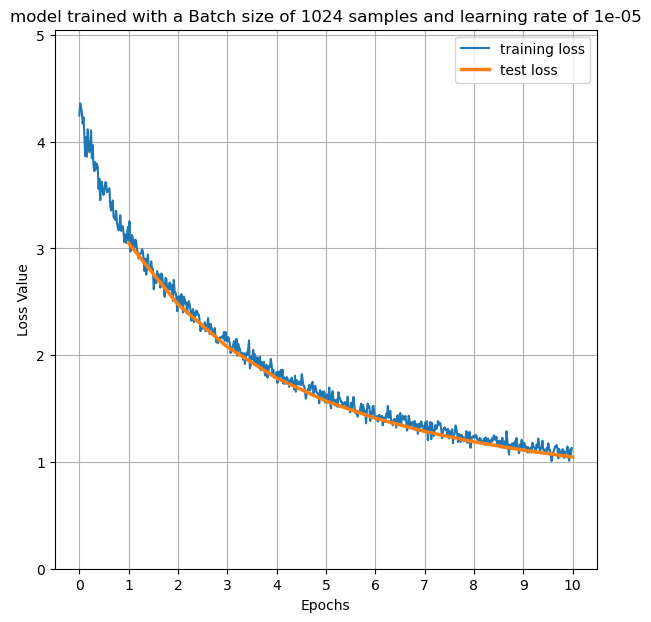

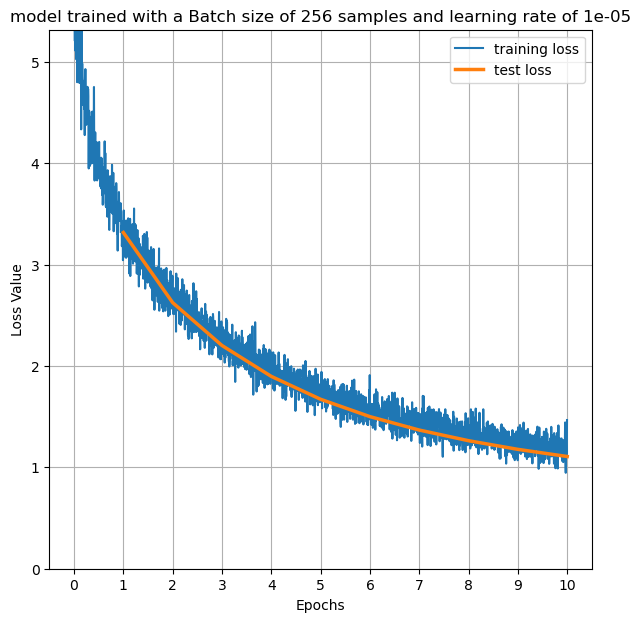

In [10]:
for bs in BatchSizes:
       
    n_batch = Xtrain.shape[0]//bs     
    if Xtrain.shape[0]%bs!=0:
        n_batch+=1
        
    E  = [n_batch*n for n in np.arange(N_EPOCHS+1)]
    Ep = [str(n) for n in np.arange(N_EPOCHS+1)]
    plt.figure(figsize=(7,7))
    plt.plot(history[bs]['train loss'],label = 'training loss')
    plt.plot(E[1:],history[bs]['test loss'][1:],linewidth=2.5,label = 'test loss')
    plt.xticks(E,Ep)
    plt.xlabel('Epochs')
    plt.ylabel('Loss Value')
    plt.ylim([0,np.max(history[bs]['test loss'])+2])
    plt.grid(True)
    plt.legend()
    plt.title(f'model trained with a Batch size of {bs} samples and learning rate of {eta}')
    plt.show()
    

## Plots of the evolution of the accuracy

10000
6


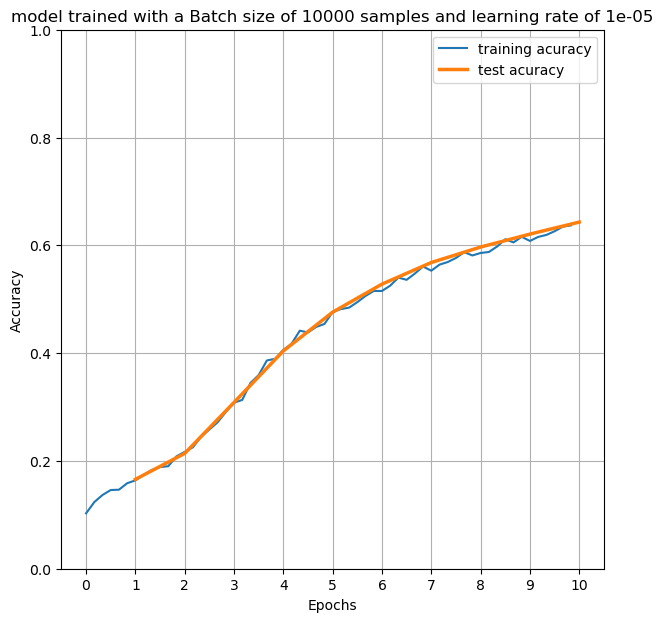

1024
59


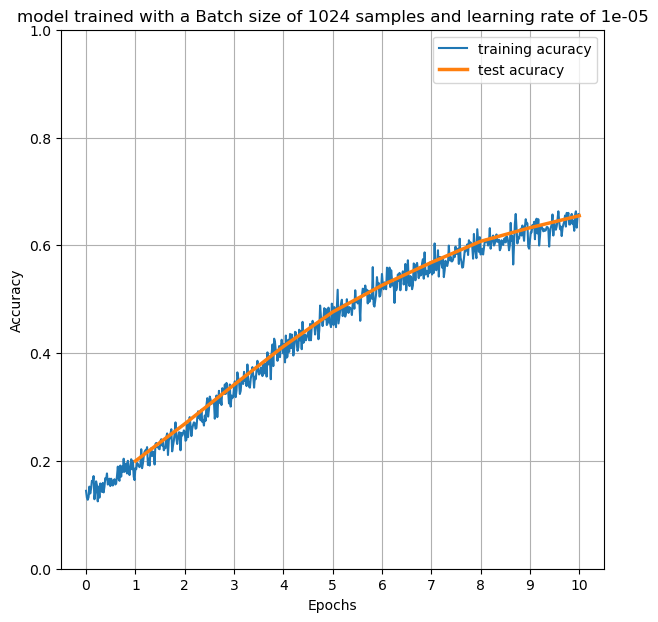

256
235


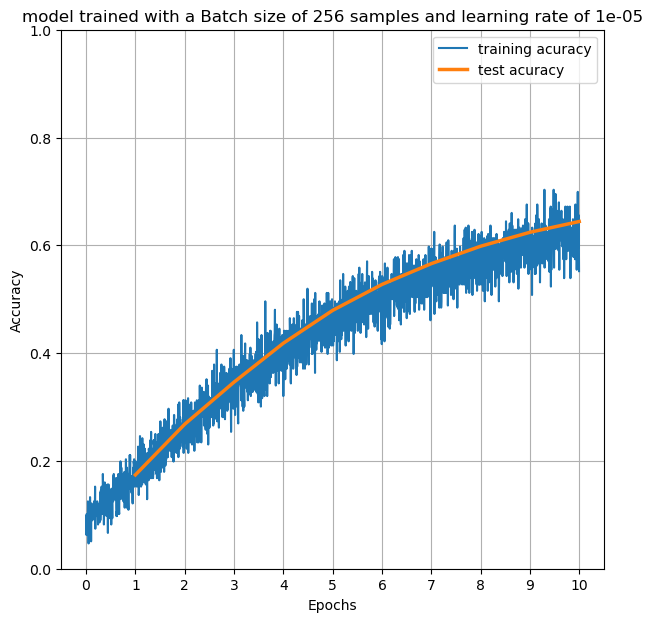

In [11]:
for bs in BatchSizes:
    print(bs)   
    n_batch = Xtrain.shape[0]//bs     
    if Xtrain.shape[0]%bs!=0:
        n_batch+=1
        
    print(n_batch)
    E=[n_batch*n for n in np.arange(N_EPOCHS+1)]
    Ep = [str(n) for n in np.arange(N_EPOCHS+1)]
    
    plt.figure(figsize=(7,7))
    plt.plot(history[bs]['train acc'] ,label  = 'training acuracy')
    plt.plot(E[1:],history[bs]['test acc'][1:],linewidth=2.5,label = 'test acuracy')
    plt.xticks(E,Ep)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.title(f'model trained with a Batch size of {bs} samples and learning rate of {eta}')
    plt.ylim([0,1])
    plt.legend()
    
    plt.show()

## Analysis of the results

Please provide your comments on the sensitivity of the results to the parameters involved in the learning process (batch size, learning rate, momentum).

### Your comments:

The choice of these hyperparameters can have a 
significant impact on the performance of the model.
The more the batch size is greater the more stable the are the updates, and to avoid going over the memory limit, the batch sizes are conservative enough to ensure computational efficiency. Furthermore, the learning rate was chosen small enough, regardless of the slow convergence, but thus, we avoid risks of overshooting the optimal weights. Lastly, the momentum was taken small enough for smoother updates.


Thank you! :)
